### Question 1

### Importing Libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

### Initial 1D data

In [104]:
# Initial Data Points
data = np.array([18, 22, 25, 27, 42, 43]).reshape(-1, 1)

### Initial proximity matrix

In [105]:
# Initialize the proximity matrix (distance matrix) using Euclidean distance
n = len(data)
proximity_matrix = np.zeros((n, n))

# Compute the initial proximity matrix (distance matrix)
for i in range(n):
    for j in range(n):
        proximity_matrix[i, j] = np.abs(data[i] - data[j])
        
print(proximity_matrix)

[[ 0.  4.  7.  9. 24. 25.]
 [ 4.  0.  3.  5. 20. 21.]
 [ 7.  3.  0.  2. 17. 18.]
 [ 9.  5.  2.  0. 15. 16.]
 [24. 20. 17. 15.  0.  1.]
 [25. 21. 18. 16.  1.  0.]]


/tmp/ipykernel_13056/2782431579.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  proximity_matrix[i, j] = np.abs(data[i] - data[j])


### Agglomerative hierarchical clustering using single linkage

In [106]:
# Function to print the proximity matrix
def print_proximity_matrix(matrix, clusters, iteration):
    print(f"\nProximity Matrix at Iteration {iteration}:")
    matrix[np.isinf(matrix)] = 0 
    # Create a new DataFrame for displaying clusters
    df = pd.DataFrame(matrix, columns=[str(clusters[i]) for i in range(len(clusters))], 
                        index=[str(clusters[i]) for i in range(len(clusters))])
    display(df)

# Agglomerative hierarchical clustering using Single Linkage (min distance)
clusters = [[data[i][0]] for i in range(n)]  # Initialize each point as a separate cluster

iteration = 0
print_proximity_matrix(proximity_matrix, clusters, iteration)

while len(clusters) > 1:
    # Find the two closest clusters
    min_dist = float('inf')
    to_merge = (None, None)

    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            # Calculate the single linkage distance (minimum distance between clusters)
            dist = np.min([np.abs(p1 - p2) 
                           for p1 in clusters[i] for p2 in clusters[j]])
            if dist < min_dist:
                min_dist = dist
                to_merge = (i, j)

    # Merge the two closest clusters
    i, j = to_merge
    clusters[i].extend(clusters[j])
    del clusters[j]

    # Update the proximity matrix
    new_matrix = np.full((len(clusters), len(clusters)), np.inf)
    for x in range(len(clusters)):
        for y in range(x + 1, len(clusters)):
            new_matrix[x, y] = new_matrix[y, x] = np.min([
                np.abs(p1 - p2)
                for p1 in clusters[x] for p2 in clusters[y]
            ])

    iteration += 1
    print_proximity_matrix(new_matrix, clusters, iteration)



Proximity Matrix at Iteration 0:


,[18],[22],[25],[27],[42],[43]
[18],0.0,4.0,7.0,9.0,24.0,25.0
[22],4.0,0.0,3.0,5.0,20.0,21.0
[25],7.0,3.0,0.0,2.0,17.0,18.0
[27],9.0,5.0,2.0,0.0,15.0,16.0
[42],24.0,20.0,17.0,15.0,0.0,1.0
[43],25.0,21.0,18.0,16.0,1.0,0.0



Proximity Matrix at Iteration 1:


,[18],[22],[25],[27],"[42, 43]"
[18],0.0,4.0,7.0,9.0,24.0
[22],4.0,0.0,3.0,5.0,20.0
[25],7.0,3.0,0.0,2.0,17.0
[27],9.0,5.0,2.0,0.0,15.0
"[42, 43]",24.0,20.0,17.0,15.0,0.0



Proximity Matrix at Iteration 2:


,[18],[22],"[25, 27]","[42, 43]"
[18],0.0,4.0,7.0,24.0
[22],4.0,0.0,3.0,20.0
"[25, 27]",7.0,3.0,0.0,15.0
"[42, 43]",24.0,20.0,15.0,0.0



Proximity Matrix at Iteration 3:


,[18],"[22, 25, 27]","[42, 43]"
[18],0.0,4.0,24.0
"[22, 25, 27]",4.0,0.0,15.0
"[42, 43]",24.0,15.0,0.0



Proximity Matrix at Iteration 4:


,"[18, 22, 25, 27]","[42, 43]"
"[18, 22, 25, 27]",0.0,15.0
"[42, 43]",15.0,0.0



Proximity Matrix at Iteration 5:


,"[18, 22, 25, 27, 42, 43]"
"[18, 22, 25, 27, 42, 43]",0.0


### Plotting dendrogram using Scipy

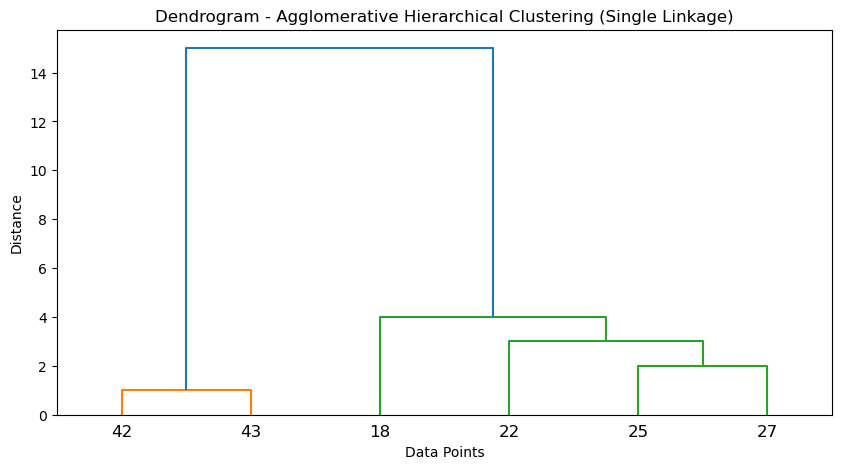

In [107]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Plot the dendrogram using scipy
linkage_matrix = linkage(data, method='single')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=[str(x) for x in data.flatten()])
plt.title('Dendrogram - Agglomerative Hierarchical Clustering (Single Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

### Question 2

### Initial 2D data

In [108]:
# Initial 2D Data Points
data = np.array([[1, 1], [3, 2], [9, 1], [3, 7], [7, 2], 
                   [9, 7], [4, 8], [8, 3], [1, 4]])

### Plotting Data

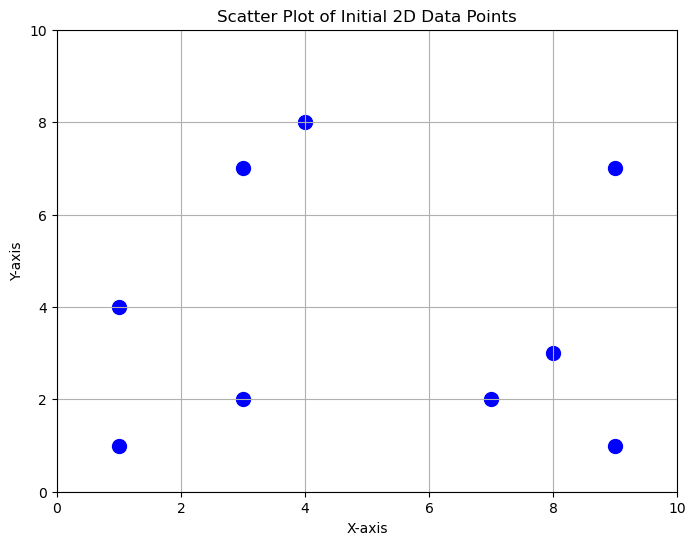

In [112]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], color='blue', s=100)  # 's' controls the size of the points
plt.title('Scatter Plot of Initial 2D Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

### Agglomerative hierarchical clustering using single linkage

In [109]:
# Function to print the proximity matrix
def print_proximity_matrix(matrix, iteration):
    print(f"\nProximity Matrix at Iteration {iteration}:")
    matrix[np.isinf(matrix)] = 0 
    df = pd.DataFrame(matrix, columns=[f"P{i}" for i in range(len(matrix))], 
                      index=[f"P{i}" for i in range(len(matrix))])
    display(df)

# Agglomerative hierarchical clustering using Single Linkage (min distance)
clusters = [[i] for i in range(n)]  # Initialize each point as a separate cluster

iteration = 0
print_proximity_matrix(proximity_matrix, iteration)

while len(clusters) > 1:
    # Find the two closest clusters
    min_dist = float('inf')
    to_merge = (None, None)
    
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            # Calculate the single linkage distance (minimum distance between clusters)
            dist = np.min([np.linalg.norm(data[p1] - data[p2]) 
                           for p1 in clusters[i] for p2 in clusters[j]])
            if dist < min_dist:
                min_dist = dist
                to_merge = (i, j)
    
    # Merge the two closest clusters
    i, j = to_merge
    clusters[i].extend(clusters[j])
    del clusters[j]
    
    # Update the proximity matrix
    new_matrix = np.full((len(clusters), len(clusters)), np.inf)
    for x in range(len(clusters)):
        for y in range(x + 1, len(clusters)):
            new_matrix[x, y] = new_matrix[y, x] = np.min([
                np.linalg.norm(data[p1] - data[p2])
                for p1 in clusters[x] for p2 in clusters[y]
            ])
    
    iteration += 1
    print_proximity_matrix(new_matrix, iteration)



Proximity Matrix at Iteration 0:


,P0,P1,P2,P3,P4,P5
P0,0.0,4.0,7.0,9.0,24.0,25.0
P1,4.0,0.0,3.0,5.0,20.0,21.0
P2,7.0,3.0,0.0,2.0,17.0,18.0
P3,9.0,5.0,2.0,0.0,15.0,16.0
P4,24.0,20.0,17.0,15.0,0.0,1.0
P5,25.0,21.0,18.0,16.0,1.0,0.0



Proximity Matrix at Iteration 1:


,P0,P1,P2,P3,P4
P0,0.000000,6.082763,5.000000,4.000000,7.810250
P1,6.082763,0.000000,8.485281,2.236068,6.000000
P2,5.000000,8.485281,0.000000,6.403124,6.000000
P3,4.000000,2.236068,6.403124,0.000000,5.385165
P4,7.810250,6.000000,6.000000,5.385165,0.000000



Proximity Matrix at Iteration 2:


,P0,P1,P2,P3
P0,0.00000,4.000000,5.000000,7.810250
P1,4.00000,0.000000,6.403124,5.385165
P2,5.00000,6.403124,0.000000,6.000000
P3,7.81025,5.385165,6.000000,0.000000



Proximity Matrix at Iteration 3:


,P0,P1,P2
P0,0.000000,5.0,5.385165
P1,5.000000,0.0,6.000000
P2,5.385165,6.0,0.000000



Proximity Matrix at Iteration 4:


,P0,P1
P0,0.000000,5.385165
P1,5.385165,0.000000



Proximity Matrix at Iteration 5:


,P0
P0,0.0


### Initial proximity matrix

In [110]:
# Initialize the proximity matrix (distance matrix) using Euclidean distance
n = len(data)
proximity_matrix = np.zeros((n, n))

# Compute the initial proximity matrix (Euclidean distance)
for i in range(n):
    for j in range(n):
        proximity_matrix[i, j] = np.linalg.norm(data[i] - data[j])
        
df = pd.DataFrame(proximity_matrix, columns=[f"P{i}" for i in range(len(proximity_matrix))],
                  index=[f"P{i}" for i in range(len(proximity_matrix))])
display(df)

,P0,P1,P2,P3,P4,P5,P6,P7,P8
P0,0.000000,2.236068,8.000000,6.324555,6.082763,10.000000,7.615773,7.280110,3.000000
P1,2.236068,0.000000,6.082763,5.000000,4.000000,7.810250,6.082763,5.099020,2.828427
P2,8.000000,6.082763,0.000000,8.485281,2.236068,6.000000,8.602325,2.236068,8.544004
P3,6.324555,5.000000,8.485281,0.000000,6.403124,6.000000,1.414214,6.403124,3.605551
P4,6.082763,4.000000,2.236068,6.403124,0.000000,5.385165,6.708204,1.414214,6.324555
P5,10.000000,7.810250,6.000000,6.000000,5.385165,0.000000,5.099020,4.123106,8.544004
P6,7.615773,6.082763,8.602325,1.414214,6.708204,5.099020,0.000000,6.403124,5.000000
P7,7.280110,5.099020,2.236068,6.403124,1.414214,4.123106,6.403124,0.000000,7.071068
P8,3.000000,2.828427,8.544004,3.605551,6.324555,8.544004,5.000000,7.071068,0.000000


### Plotting dendrogram using Scipy

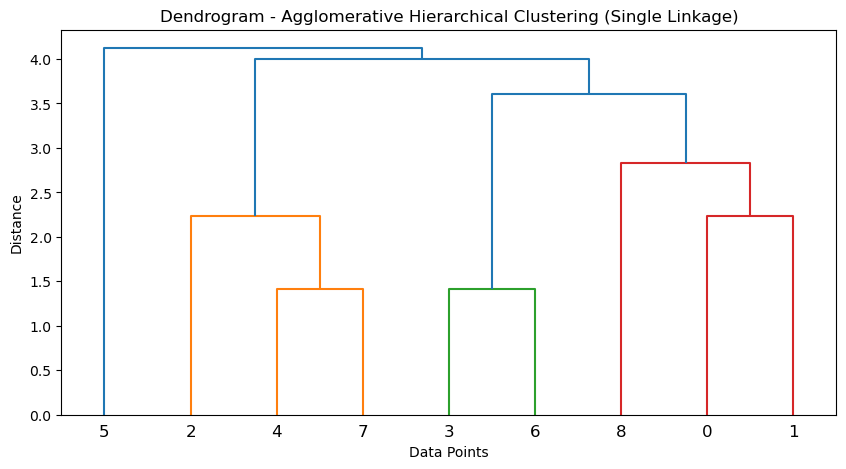

In [111]:
linkage_matrix = linkage(data, method='single')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=[str(x) for x in range(len(data))])
plt.title('Dendrogram - Agglomerative Hierarchical Clustering (Single Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()